In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

In [2]:
# HIDDEN
s = np.arange(1, 6)
def refl_walk_probs(i, j):
    if i-j == 0:
        return 0.5
    elif 2 <= i <= 4:
        if abs(i-j) == 1:
            return 0.25
        else:
            return 0
    elif i == 1:
        if j == 2:
            return 0.5
        else:
            return 0
    elif i == 5:
        if j == 4:
            return 0.5
        else:
            return 0
        
reflecting_walk = MarkovChain.from_transition_function(s, refl_walk_probs)

## Examples ##

Here are two examples to illustrate how to find the stationary distribution and how to use it.

### A Diffusion Model by Ehrenfest ###
[Paul Ehrenfest](https://en.wikipedia.org/wiki/Paul_Ehrenfest) proposed a number of models for the diffusion of gas particles, one of which we will study here.

The model says that there are two containers containing a total of $N$ particles. At each instant, a container is selected at random and a particle is selected at random independently of the container. Then the selected particle is placed in the selected container; if it was already in that container, it stays there.

Let $X_n$ be the number of particles in Container 1 at time $n$. Then $X_0, X_1, \ldots$ is a Markov chain with transition probabilities given by:

$$
\begin{equation}
P(i, j) = 
 \begin{cases} 
      \frac{N-i}{2N} & \text{if } j = i+1 \\
      \frac{1}{2} & \text{if } j = i \\
      \frac{i}{2N} & \text{if } j = i-1 \\
      0 & \text{otherwise}
   \end{cases}
\end{equation}
$$

The chain is clearly irreducible. It is aperiodic because $P(i, i) > 0$.

**Question:** What is the stationary distribution of the chain? 

**Answer:** We have computers. So let's first find the stationary distribution for $N=100$ particles, and then see if we can identify it for general $N$.

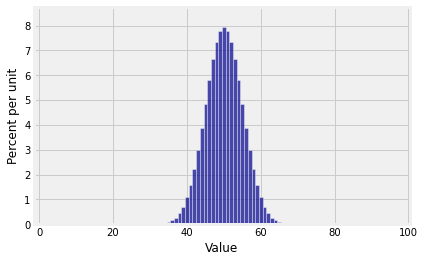

In [3]:
N = 100

states = np.arange(N+1)

def transition_probs(i, j):
    if j == i:
        return 1/2
    elif j == i+1:
        return (N-i)/(2*N)
    elif j == i-1:
        return i/(2*N)
    else:
        return 0

ehrenfest = MarkovChain.from_transition_function(states, transition_probs)
Plot(ehrenfest.steady_state(), edges=True)

That looks suspiciously like the binomial (100, 1/2) distribution. In fact it *is* the binomial (100, 1/2) distribution. Let's solve the balance equations to prove this.

The balance equations are:

$$
\begin{align*}
\pi(0) &= \frac{1}{2}\pi(0) + \frac{1}{2N}\pi(1) \\
\pi(j) &= \frac{N-(j-1)}{2N}\pi(j-1) + \frac{1}{2}\pi(j) + \frac{j+1}{2N}\pi(j+1), ~~~ 1 \le j \le N-1 \\
\pi(N) &= \frac{1}{2N}\pi(N-1) + \frac{1}{2}\pi(N)
\end{align*}
$$

Now rewrite each equation to express all the elements of $\pi$ in terms of $\pi(0)$. You will get:

$$
\begin{align*}
\pi(1) &= N\pi(0) \\ \\
\pi(2) &= \frac{N(N-1)}{2} \pi(0) = \binom{N}{2} \pi(0)
\end{align*}
$$

and so on by induction:

$$
\pi(j) = \binom{N}{j} \pi(0), ~~~~~~~~ 1 \le j \le N
$$

This is true for $j = 0$ as well, since $\binom{N}{0} = 1$.

Therefore the stationary distribution is 

$$
\pi ~ = ~ \big{[} \binom{N}{0}\pi(0), \binom{N}{1}\pi(0), \binom{N}{2}\pi(0), \ldots, \binom{N}{N}\pi(0) \big{]}
$$

In other words, the stationary distribution is proportional to the binomial coefficients. Now

$$
\sum_{j=0}^N \binom{N}{j} ~ = ~ (1 + 1)^N = 2^N
$$

So $\pi(0) = 1/2^N$ and the stationary distribution is binomial $(N, 1/2)$.

### Expected Reward ###
Suppose I run the sticky reflecting random walk from the previous section for a long time. As a reminder, here is its stationary distribution.

In [4]:
stationary = reflecting_walk.steady_state()
stationary

Value,Probability
1,0.125
2,0.25
3,0.25
4,0.25
5,0.125


**Question 1:** Suppose that every time the chain is in state 4, I win 4 dollars; every time it's in state 5, I win 5 dollars; otherwise I win nothing. What is my expected long run average reward?

**Answer 1:** In the long run, the chain is in steady state. So I expect that on 62.5% of the moves I will win nothing; on 25% of the moves I will win 4 dollars; and on 12.5% of the moves I will win 5 dollars. My expected long run average reward per move is 1.65 dollars.

In [5]:
0*0.625 + 4*0.25 + 5*.125

1.625

**Question 2:** Suppose that every time the chain is in state $i$, I toss $i$ coins and record the number of heads. In the long run, how many heads do I expect to get on average per move?

**Answer 2:** Each time the chain is in state $i$, I expect to get $i/2$ heads. When the chain is in steady state, the expected number of coins I toss at any given move is 3. So, by iterated expectations, the long run average number of heads I expect to get is 1.5.

In [6]:
stationary.ev()/2

1.500000000000002

If that seems artificial, consider this: Suppose I play the game above, and on every move I tell you the number of heads that I get *but I don't tell you which state the chain is in.* I *hide* the underlying Markov Chain. If you try to recreate the sequence of steps that the Markov Chain took, you are working with a Hidden Markov Model. These are much used in pattern recognition, bioinformatics, and other fields.